### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Importing dataset


In [2]:
data = pd.read_csv('Position_Salaries.csv')

### Data pre-processing

In [3]:
data.shape

(10, 3)

In [4]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


// NO NULL VALUES

In [5]:
data.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [6]:
x= data.iloc[:,1:2].values
y= data.iloc[:,2:3].values

### Train-Test-Split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .75, random_state = 0)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x1 = sc_x.fit_transform(x)
y1 = sc_y.fit_transform(y)


#### Applying regression algorithms ( SVR, Decision Tree Regression and RandomForest regression) to see which gives the best accuracy 

## SUPPORT VECTOR REGRESSION

In [28]:
#FITTING SVR TO DATASET
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x1, y1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
#PREDICTING NEW RESULT
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
y_pred



array([170370.0204065])

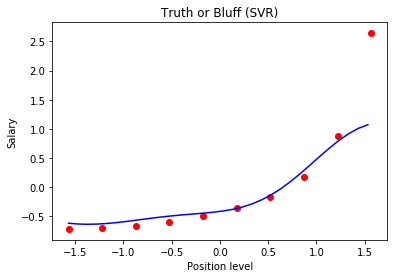

In [30]:
#VISUALISING SVR RESULTS
x_grid = np.arange(min(x1), max(x1), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x1, y1, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color= 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() 

## DECISION TREE REGRESSION

In [24]:
#FITTING Decision Tree Regressor TO DATASET
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state =0)
regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [25]:
#PREDICTING NEW RESULT
y_pred = regressor.predict([[6.5]])
print(y_pred)

[150000.]


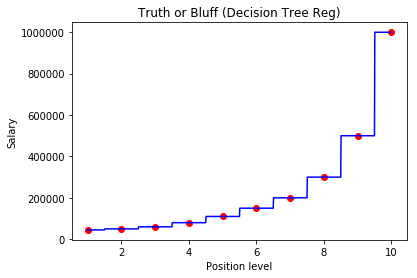

In [26]:
#include x_grid for higher resolution
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x, y, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color= 'blue')
plt.title('Truth or Bluff (Decision Tree Reg)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() 

## RANDOM TREE REGRESSION

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred = regressor.predict([[6.5]])
print(y_pred)

[160500.]


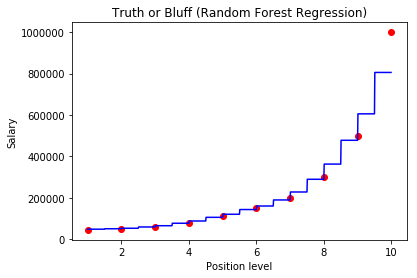

In [36]:
# Visualising the Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [37]:
# we see we get more number of decision trees and thus more stairs and therefore 
# a lot more of splits of the whole range of intervals of the different levels which is 
# helping us getting better predictions.

In [39]:
# Model Accuracy
print("TRAIN-SET ACCURACY = ",regressor.score(x_train,y_train)*100,"%")
print("TEST-SET ACCURACY = ",regressor.score(x_test,y_test)*100,"%")

TRAIN-SET ACCURACY =  94.47392137557522 %
TEST-SET ACCURACY =  99.56822982481333 %
